 <div style='font-size:100%;'>
    <a id='import'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center> Importing necessary libraries 📚 </center>
    </h1>
 
</div> 

In [2]:
# import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from numpy import isnan
from pandas import read_csv
from datetime import date
import warnings
warnings.filterwarnings('ignore')


<div style='font-size:100%;'>
    <a id='import'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center>importing Dataset  ⬇️  </center>
    </h1>
 
</div> 

Traffic characteristics over space and time constitute an important aspect of cellular networks in consideration of resource provision, traffic engineering and system optimization. Despite recent progress in revealing temporal dynamics and spatial inhomogeneity of cellular traffic, limited knowledge about traffic dependence is gained. One of challenges comes from the absence of sustained observations at a network-wide scale. To complement this gap, we make an analysis on week-long traffic generated by a large population of people in a median-size city of China. Here we contribute the basic dimensions of this data to public communities to stimulate more research enthusiasm on this topic.

Our analyses make use of request-response records extracted from HTTP traffic at the city scale, consisting of individuals’ activities during a continuous week (actually eight days from Aug. 19 to Aug. 26, 2012), with accurate timestamp and location information indicated by connected cellular base stations (BS). Each individual is detected by the hashed International Mobile Subscriber Identity (IMSI).

In [3]:
df=pd.read_csv('cellular_traffic.csv')

In [4]:
df

,bs,time_hour,users,packets,bytes
0,1,1345305600,1,3,3473.0
1,2,1345305600,1,12,2496.0
2,3,1345305600,1,18,5616.0
3,4,1345305600,1,113,156068.0
4,5,1345305600,1,19,5928.0
...,...,...,...,...,...
1625675,7993,1345993200,159,29125,41199852.0
1625676,7995,1345993200,168,24182,36864079.0
1625677,7997,1345993200,190,33781,78226635.0
1625678,7998,1345993200,198,34345,228122304.0




<div style='font-size:100%;'>
    <a id='import'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center>DataSet Information from median-size city of China  </center>
    </h1>
 
</div> 

### BS: identity of each cellular base station in this public data.
### Time_hour: hourly timestamp in UNIX epoch time (time zone GMT+8).
### Users: the number of active users associated with specific base station and hour.
### Packets: the number of transferd packets associated with specific base station and hour.
### Bytes: the number of transferd bytes associated with specific base station and hour.

In [4]:
df.head()


,bs,time_hour,users,packets,bytes
0,1,1345305600,1,3,3473.0
1,2,1345305600,1,12,2496.0
2,3,1345305600,1,18,5616.0
3,4,1345305600,1,113,156068.0
4,5,1345305600,1,19,5928.0


<div style='font-size:100%;'>
    <a id='import'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center>Studying the relashion between number of users with datausuage  </center>
    </h1>
 
</div> 

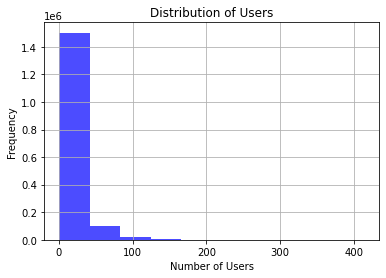

In [16]:
plt.figure(figsize=(6, 4))
plt.hist(df['users'], bins=10, color='b', alpha=0.7)
plt.xlabel('Number of Users')
plt.ylabel('Frequency')
plt.title('Distribution of Users')
plt.grid(True)
plt.show()

In [18]:
df.users.unique()

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  68,  69,  70,  71,  72,  73,  74,  75,  77,  78,  80,  81,
        82,  83,  84,  86,  87,  88,  89,  90,  91,  92,  93,  94,  95,
        97,  98, 102, 105, 111, 112, 116, 120, 133, 138, 153, 154, 165,
       197, 209,  67,  99, 108, 132, 148, 117,  79,  85, 109,  76, 100,
       104, 107, 122, 124, 144,  96, 101, 106, 119, 125, 126, 128, 130,
       150, 155, 160, 163, 174, 103, 110, 113, 114, 115, 118, 137, 139,
       141, 159, 164, 121, 135, 136, 140, 149, 178, 127, 147, 151, 152,
       161, 129, 143, 146, 162, 167, 169, 177, 123, 131, 145, 158, 179,
       157, 166, 168, 171, 175, 182, 156, 183, 172, 185, 190, 20

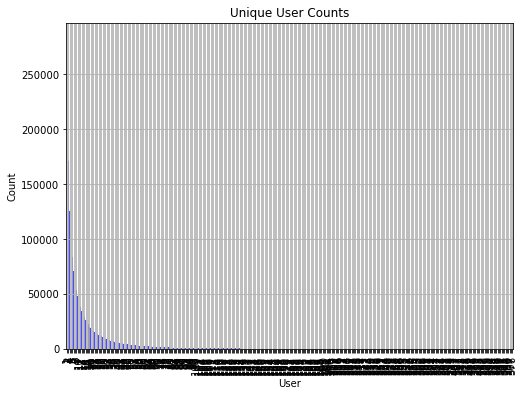

In [25]:
unique_user_counts = df['users'].value_counts()

# Create a bar plot for the unique user counts
plt.figure(figsize=(8, 6))
unique_user_counts.plot(kind='bar', color='b', alpha=0.7)
plt.xlabel('User')
plt.ylabel('Count')
plt.title('Unique User Counts')
plt.grid(True)
plt.show()

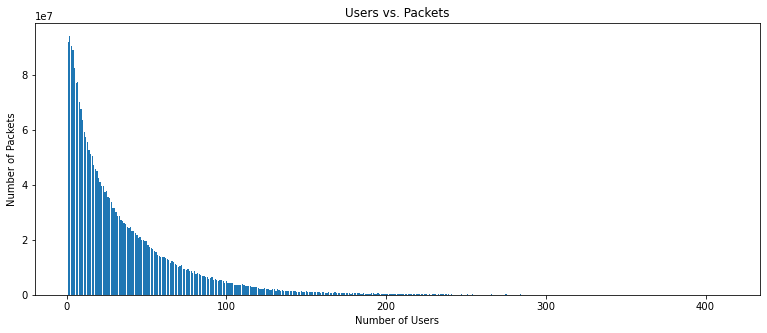

In [7]:
grouped_data = df.groupby('users')['packets'].sum().reset_index()

# Create a bar plot
plt.figure(figsize=(13, 5))
plt.bar(grouped_data['users'], grouped_data['packets'])
plt.xlabel('Number of Users')
plt.ylabel('Number of Packets')
plt.title('Users vs. Packets')
plt.show()

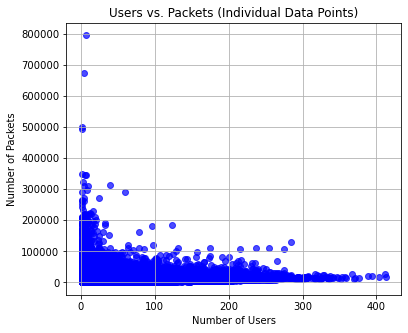

In [7]:
plt.figure(figsize=(6, 5))
plt.scatter(df['users'], df['packets'], color='b', alpha=0.7)
plt.xlabel('Number of Users')
plt.ylabel('Number of Packets')
plt.title('Users vs. Packets (Individual Data Points)')
plt.grid(True)
plt.show()

This code will create a scatter plot that shows the relationship between the number of packets and the number of bytes. Each point on the plot represents a data point in your DataFrame. The x-axis represents the number of packets, and the y-axis represents the number of bytes.



In [9]:
correlation_matrix = df.corr()

print(correlation_matrix)

                 bs  time_hour     users   packets     bytes
bs         1.000000   0.032906  0.171912  0.077581  0.007110
time_hour  0.032906   1.000000 -0.003678 -0.002069  0.000464
users      0.171912  -0.003678  1.000000  0.383901  0.035054
packets    0.077581  -0.002069  0.383901  1.000000  0.183417
bytes      0.007110   0.000464  0.035054  0.183417  1.000000


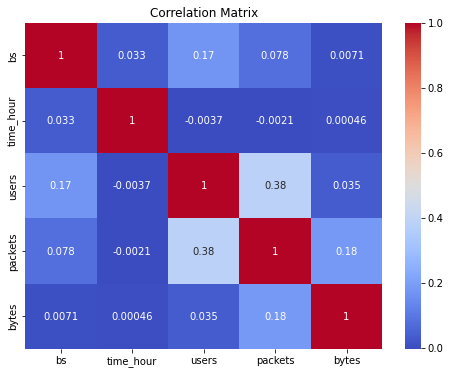

In [10]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<div style='font-size:100%;'>
    <a id='import'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center>Studying the relashion between Packets and Bytes  </center>
    </h1>
 
</div> 

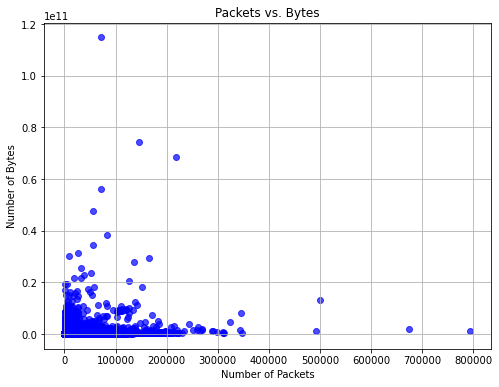

In [8]:
plt.figure(figsize=(8, 6))
plt.scatter(df['packets'], df['bytes'], color='b', alpha=0.7)
plt.xlabel('Number of Packets')
plt.ylabel('Number of Bytes')
plt.title('Packets vs. Bytes')
plt.grid(True)
plt.show()


In [5]:
df.columns

Index(['bs', 'time_hour', 'users', 'packets', 'bytes'], dtype='object')

In [6]:
print(df.shape)

(1625680, 5)


In [7]:
df.dtypes

bs             int64
time_hour      int64
users          int64
packets        int64
bytes        float64
dtype: object

In [8]:
df.isnull().sum()

bs           0
time_hour    0
users        0
packets      0
bytes        0
dtype: int64

In [9]:
#Pourcentage des valeurs null
(df.isnull().sum()/df.shape[0])*100

bs           0.0
time_hour    0.0
users        0.0
packets      0.0
bytes        0.0
dtype: float64

In [10]:
all_none_columns = []
for col in df.columns:
    if df[col].isnull().all():
        all_none_columns.append(col)
# Print the names of the columns that have all None values
print('Columns with all None values:', all_none_columns)

Columns with all None values: []


<div style='font-size:100%;'>
    <a id='discover'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center> Discovering the dataset 🔎 </center>
    </h1>
</div> 

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bs,1625680.0,5.372162e+03,3.060182e+03,1.000000e+00,2.938000e+03,5.276000e+03,7.528000e+03,1.326900e+04
time_hour,1625680.0,1.345643e+09,1.952034e+05,1.345306e+09,1.345475e+09,1.345637e+09,1.345806e+09,1.345993e+09
users,1625680.0,1.377170e+01,2.034654e+01,1.000000e+00,2.000000e+00,6.000000e+00,1.600000e+01,4.130000e+02
packets,1625680.0,1.724474e+03,4.600335e+03,0.000000e+00,7.200000e+01,4.430000e+02,1.695000e+03,7.945850e+05
bytes,1625680.0,8.223766e+06,1.902086e+08,0.000000e+00,8.074000e+04,5.738290e+05,2.553905e+06,1.148665e+11


<div style='font-size:100%;'>
    <a id='clean'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center> Visualizing and cleaning Outliers 📊</center>
    </h1>
</div>

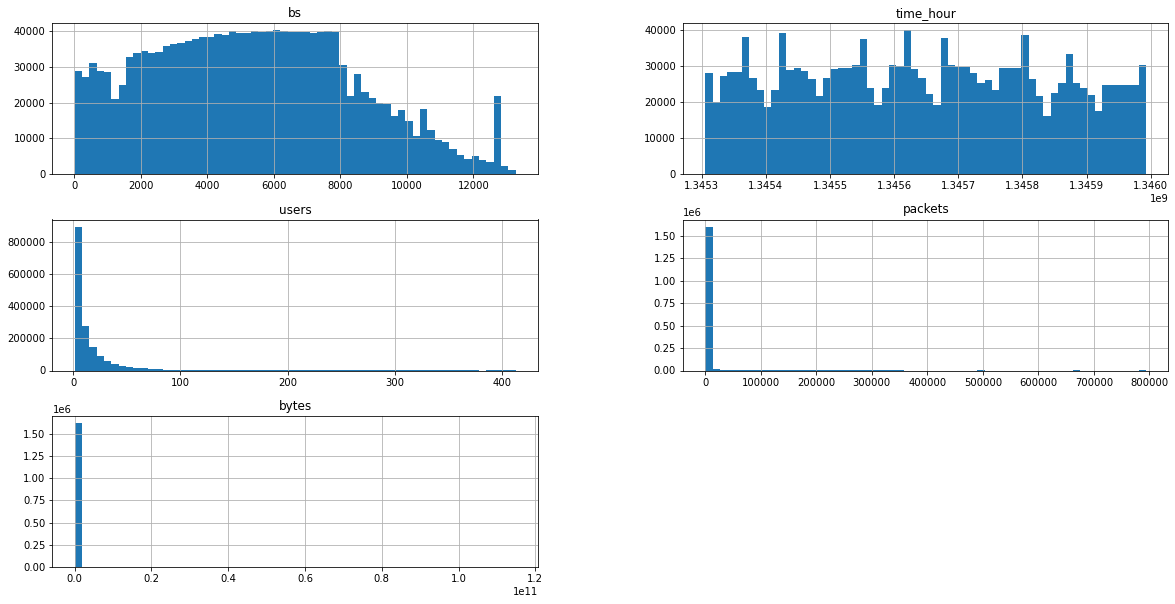

In [14]:
hist = df.hist(bins=60 , figsize=(20,10))

<AxesSubplot:>

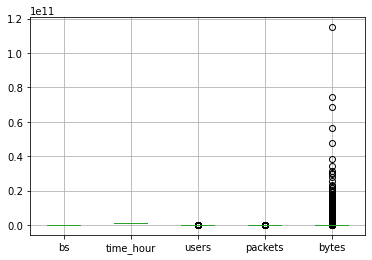

In [15]:
df.boxplot()

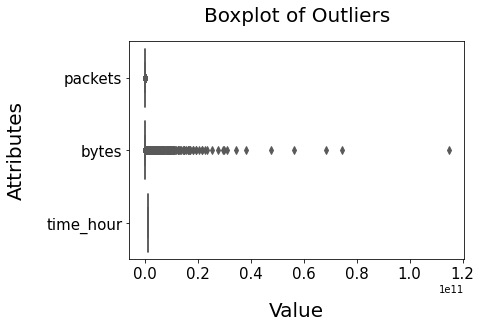

In [16]:
column=['packets','bytes', 'time_hour']
ax = sns.boxplot(data = df[column], orient = "h", palette = "Set2")
#add labels
ax.set_xlabel("Value", fontsize = 20, labelpad = 20)
ax.set_ylabel("Attributes", fontsize = 20, labelpad = 20)
ax.set_title("Boxplot of Outliers", fontsize = 20,pad = 20)
#edit ticks
ax.tick_params(which = "both", labelsize = 15)

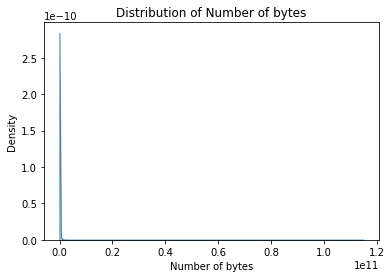

In [17]:
sns.kdeplot(df['bytes'], shade=True, color='steelblue')
plt.xlabel('Number of bytes')
plt.ylabel('Density')
plt.title('Distribution of Number of bytes')
plt.show()


In [7]:
##df['bytes'].value_counts(sort=False).plot.bar(figsize=(10,6), 
                                                    ## title="Frequency of molecules according to their number of rings", 
                                                    ## xlabel='Number of num rings',
                                                    ## ylabel='Absolute frequency',
                                                    ## rot=0,
                                                    ## edgecolor='k')
##plt.show()##

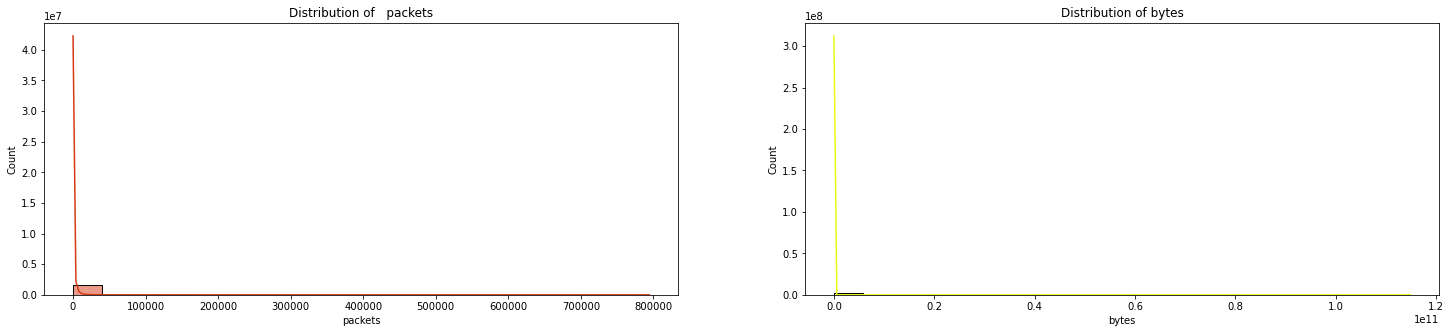

In [21]:
fig, axes = plt.subplots(1, 2, figsize = (25, 5))
ax = axes.flatten()
sns.histplot(ax = axes[0], x = df["packets"], bins = 20, kde = True, color = "#D63913").set(title = "Distribution of   packets");
sns.histplot(ax = axes[1], x = df["bytes"], bins = 20, kde = True, color = "#EAF90E").set(title = "Distribution of bytes");


In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.scatterplot(x='users', y='packets', data=df, size='time_hour', edgecolor='black', alpha=0.7)

plt.xlabel('users', fontsize=14, fontweight='bold')
plt.ylabel('packets', fontsize=14, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [7]:
import sys, os
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action='ignore')
import seaborn as sns
import pandas as pd
from datetime import datetime
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN, LSTM, Activation, Dropout
import math
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [8]:
def last_n_days(df, feature, n_days):
    """
    Extract last n_days of a time series
    """
    
    return df[feature][-(24*n_days):] 


In [9]:
def plot_last_n_days(df, feature, n_days):
    """
    Plot last n_days of an hourly time series 
    """
    plt.figure(figsize = (10,5))   
    plt.plot(last_n_days(df, feature, n_days), 'k-')
    plt.title('{0} Time Series - {1} days'
              .format(feature, n_days))
    plt.xlabel('Recorded hour')
    plt.ylabel('quantity')
    plt.grid(alpha=0.3)

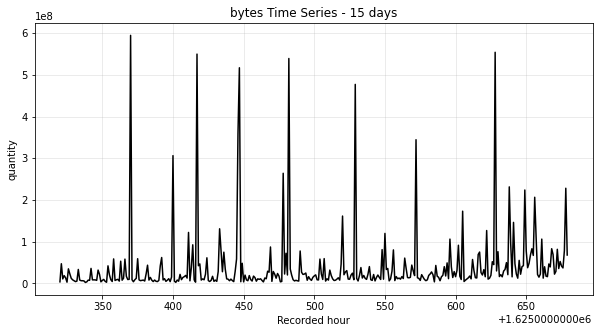

In [16]:
plot_last_n_days(df, 'bytes', 15)

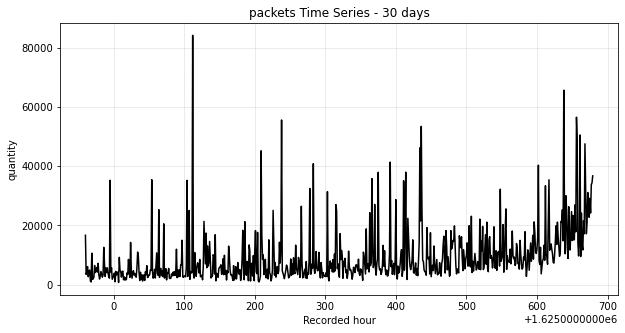

In [17]:
plot_last_n_days(df, 'packets', 30)

In [ ]:
plt.figure(figsize=(12,5),facecolor="#627D78")
count = sns.countplot(data=df, x =df["time_hour"], hue="bs")
count.set_title("Count Of Traffic On Junctions Over Years")
count.set_ylabel("Number of Vehicles")
count.set_xlabel("Date")

 <div style='font-size:100%;'>
    <a id='import'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center>Preprocessing</center>
    </h1>
 
</div> 

In [10]:
def get_keras_format_series(series):
    """
    Convert a series to a numpy array of shape 
    [n_samples, time_steps, features]
    """
    
    series = np.array(series)
    return series.reshape(series.shape[0], series.shape[1], 1)

In [11]:
def get_train_test_data(df, series_name, series_days, input_hours, test_hours, sample_gap=3):
    """
    Utility processing function that splits an hourly time series into 
    train and test with keras-friendly format, according to user-specified
    choice of shape.    
    
    arguments
    ---------
    df (dataframe): dataframe with time series columns
    series_name (string): column name in df
    series_days (int): total days to extract
    input_hours (int): length of sequence input to network 
    test_hours (int): length of held-out terminal sequence
    sample_gap (int): step size between start of train sequences; default 5
    
    returns
    ---------
    tuple: train_X, test_X_init, train_y, test_y     
    """
    forecast_series = last_n_days(df, series_name, series_days).values # reducing our forecast series to last n days

    train = forecast_series[:-test_hours] # training data is remaining days until amount of test_hours
    test = forecast_series[-test_hours:] # test data is the remaining test_hours

    train_X, train_y = [], []
    for i in range(0, train.shape[0]-input_hours, sample_gap): 
        train_X.append(train[i:i+input_hours]) # each training sample is of length input hours
        train_y.append(train[i+input_hours]) # each y is just the next step after training sample

    train_X = get_keras_format_series(train_X) # format our new training set to keras format
    train_y = np.array(train_y) # make sure y is an array to work properly with keras
    
    # The set that we had held out for testing (must be same length as original train input)
    test_X_init = test[:input_hours] 
    test_y = test[input_hours:] # test_y is remaining values from test set
    
    return train_X, test_X_init, train_y, test_y

In [12]:
series_days = 72
input_hours = 12
test_hours = 24

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(df, 'bytes', series_days, 
                         input_hours, test_hours))

In [38]:
train_y.shape

(564,)

In [39]:
print('Training input shape: {}'.format(train_X.shape))
print('Training output shape: {}'.format(train_y.shape))
print('Test input shape: {}'.format(test_X_init.shape))
print('Test output shape: {}'.format(test_y.shape))

Training input shape: (564, 12, 1)
Training output shape: (564,)
Test input shape: (12,)
Test output shape: (12,)


 <img src="rnnlstm.png" alt="Example Image" width="500">

 <div style='font-size:100%;'>
    <a id='import'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center>Modeling RNN </center>
    </h1>
 
</div> 

In [40]:
def fit_SimpleRNN(train_X, train_y, cell_units, epochs):
    """
    Fit Simple RNN to data train_X, train_y 
    
    arguments
    ---------
    train_X (array): input sequence samples for training 
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for RNN cells  
    epochs (int): number of training epochs   
    """

    # initialize model
    model = Sequential() 
    
    # construct an RNN layer with specified number of hidden units
     # per cell and desired sequence input format 
    model.add(SimpleRNN(cell_units, input_shape=(train_X.shape[1],1)))
    
    # add an output layer to make final predictions 
    model.add(Dense(1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, batch_size=64, verbose=0)
    
    return model

In [41]:
model = fit_SimpleRNN(train_X, train_y, cell_units=10, epochs=10)

In [42]:
def predict(X_init, n_steps, model):
    """
    Given an input series matching the model's expected format,
    generates model's predictions for next n_steps in the series      
    """
    
    X_init = X_init.copy().reshape(1,-1,1)
    preds = []
    
    # iteratively take current input sequence, generate next step pred,
    # and shift input sequence forward by a step (to end with latest pred).
    # collect preds as we go.
    for _ in range(n_steps):
        pred = model.predict(X_init)
        preds.append(pred)
        X_init[:,:-1,:] = X_init[:,1:,:] # replace first 11 values with 2nd through 12th
        X_init[:,-1,:] = pred # replace 12th value with prediction
    
    preds = np.array(preds).reshape(-1,1)
    
    return preds


In [43]:
def predict_and_plot(X_init, y, model, title):
    """
    Given an input series matching the model's expected format,
    generates model's predictions for next n_steps in the series,
    and plots these predictions against the ground truth for those steps 
    
    arguments
    ---------
    X_init (array): initial sequence, must match model's input shape
    y (array): true sequence values to predict, follow X_init
    model (keras.models.Sequential): trained neural network
    title (string): plot title   
    """
    
    y_preds = predict(test_X_init, n_steps=len(y), model=model) # predict through length of y
    # Below ranges are to set x-axes
    start_range = range(1, test_X_init.shape[0]+1) #starting at one through to length of test_X_init to plot X_init
    predict_range = range(test_X_init.shape[0], test_hours)  #predict range is going to be from end of X_init to length of test_hours
    
    #using our ranges we plot X_init
    plt.plot(start_range, test_X_init)
    #and test and actual preds
    plt.plot(predict_range, test_y, color='orange')
    plt.plot(predict_range, y_preds, color='teal', linestyle='--')
    
    plt.title(title)
    plt.legend(['Initial Series','Target Series','Predictions'])

1/1 [==============================] - 0s 17ms/step


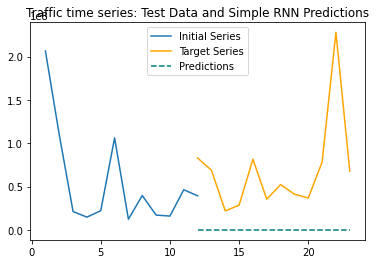

In [29]:
predict_and_plot(test_X_init, test_y, model,
                 'Traffic time series: Test Data and Simple RNN Predictions')

1/1 [==============================] - 0s 19ms/step


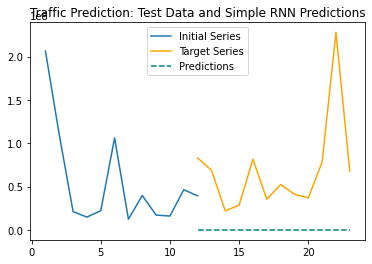

In [44]:
model = fit_SimpleRNN(train_X, train_y, cell_units=30, epochs=1200)
predict_and_plot(test_X_init, test_y, model,
                 'Traffic Prediction: Test Data and Simple RNN Predictions')

In [31]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_1 (SimpleRNN)    (None, 30)                960       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 991
Trainable params: 991
Non-trainable params: 0
_________________________________________________________________


 <div style='font-size:100%;'>
    <a id='import'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center>Modeling LSTM </center>
    </h1>
 
</div> 

In [32]:
def fit_LSTM(train_X, train_y, cell_units, epochs):
    """
    Fit LSTM to data train_X, train_y 
    
    arguments
    ---------
    train_X (array): input sequence samples for training 
    train_y (list): next step in sequence targets
    cell_units (int): number of hidden units for LSTM cells  
    epochs (int): number of training epochs   
    """
    
    # initialize model
    model = Sequential() 
    
    # construct a LSTM layer with specified number of hidden units
    # per cell and desired sequence input format 
    model.add(LSTM(cell_units, input_shape=(train_X.shape[1],1))) #,return_sequences= True))
    #model.add(LSTM(cell_units_l2, input_shape=(train_X.shape[1],1)))
    
    # add an output layer to make final predictions 
    model.add(Dense(1))
    
    # define the loss function / optimization strategy, and fit
    # the model with the desired number of passes over the data (epochs) 
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(train_X, train_y, epochs=epochs, batch_size=64, verbose=0)
    
    return model

1/1 [==============================] - 0s 20ms/step


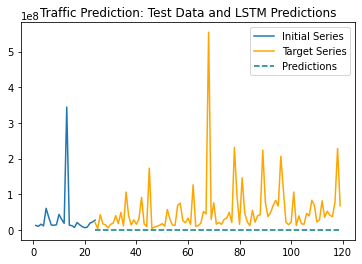

In [36]:
series_days = 100
input_hours = 24
test_hours = 120

train_X, test_X_init, train_y, test_y = \
    (get_train_test_data(df, 'bytes', series_days, 
                         input_hours, test_hours))

model = fit_LSTM(train_X, train_y, cell_units=70, epochs=3000) 

predict_and_plot(test_X_init, test_y, model, 
                 'Traffic Prediction: Test Data and LSTM Predictions')


 <div style='font-size:100%;'>
    <a id='import'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center>FFNN Model  </center>
    </h1>
 
</div> 

  <div style='font-size:100%;'>
    <a id='import'></a>
    <h1 style='color: black; font-weight: bold; font-family: Cascadia code;'>
        <center>LSTM Model  </center>
    </h1>
 
</div> 